In [1]:
import pandas as pd

In [3]:
specgals = pd.read_csv("sdss_specgals.csv", header=0)

print(specgals.columns)
specgals.head()

Index(['ra', 'dec', 'mjd', 'plate', 'fiberID', 'z', 'zErr', 'rChi2', 'velDisp',
       'velDispErr', 'extinction_r', 'petroMag_r', 'psfMag_r', 'psfMagErr_r',
       'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g',
       'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i',
       'modelMag_z', 'modelMagErr_z', 'petroR50_r', 'petroR90_r',
       'nii_6584_flux', 'nii_6584_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_beta_flux', 'h_beta_flux_err', 'h_delta_flux', 'h_delta_flux_err',
       'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID',
       'specObjID'],
      dtype='object')


,ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,...,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID
0,146.714191,-1.041276,51630,266,1,0.021222,0.000009,1.500621,131.863570,4.193524,...,6.650275,23.382048,6.433518,1.864510,0.014446,3,10.294713,-0.527342,1237648720142401611,299489677444933632
1,146.744142,-0.652220,51630,266,2,0.203783,0.000039,1.302946,174.164760,13.752029,...,2.697799,1.221214,2.102120,2.157893,0.054713,-1,11.365371,-0.772339,1237650795146510627,299489952322840576
2,146.628573,-0.765147,51630,266,4,0.064656,0.000021,1.227629,123.036330,9.821034,...,2.906838,6.669699,3.581208,1.798716,0.030005,3,10.565862,-1.155230,1237650795146445031,299490502078654464
3,146.631673,-0.988261,51630,266,6,0.052654,0.000009,1.404003,41.803913,24.241034,...,2.279489,11.307991,3.058364,1.388878,0.033203,1,9.363875,-0.411009,1237648720142401670,299491051834468352
4,146.919416,-0.990517,51630,266,7,0.213861,0.000040,1.332148,143.521130,14.563519,...,2.622802,0.239994,2.116303,1.923569,0.047452,-1,11.161670,-0.350026,1237648720142532891,299491326712375296


In [4]:
modelMag_cols = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
model_vals = specgals[modelMag_cols]

# Meta: rename the columns since pandas doesn't like underscores in column names
for colname in modelMag_cols:
    model_vals[colname].rename(colname.split("_")[-1], inplace=True)

array([[<Axes: xlabel='modelMag_u', ylabel='modelMag_u'>,
        <Axes: xlabel='modelMag_g', ylabel='modelMag_u'>,
        <Axes: xlabel='modelMag_r', ylabel='modelMag_u'>,
        <Axes: xlabel='modelMag_i', ylabel='modelMag_u'>,
        <Axes: xlabel='modelMag_z', ylabel='modelMag_u'>],
       [<Axes: xlabel='modelMag_u', ylabel='modelMag_g'>,
        <Axes: xlabel='modelMag_g', ylabel='modelMag_g'>,
        <Axes: xlabel='modelMag_r', ylabel='modelMag_g'>,
        <Axes: xlabel='modelMag_i', ylabel='modelMag_g'>,
        <Axes: xlabel='modelMag_z', ylabel='modelMag_g'>],
       [<Axes: xlabel='modelMag_u', ylabel='modelMag_r'>,
        <Axes: xlabel='modelMag_g', ylabel='modelMag_r'>,
        <Axes: xlabel='modelMag_r', ylabel='modelMag_r'>,
        <Axes: xlabel='modelMag_i', ylabel='modelMag_r'>,
        <Axes: xlabel='modelMag_z', ylabel='modelMag_r'>],
       [<Axes: xlabel='modelMag_u', ylabel='modelMag_i'>,
        <Axes: xlabel='modelMag_g', ylabel='modelMag_i'>,
        <Ax

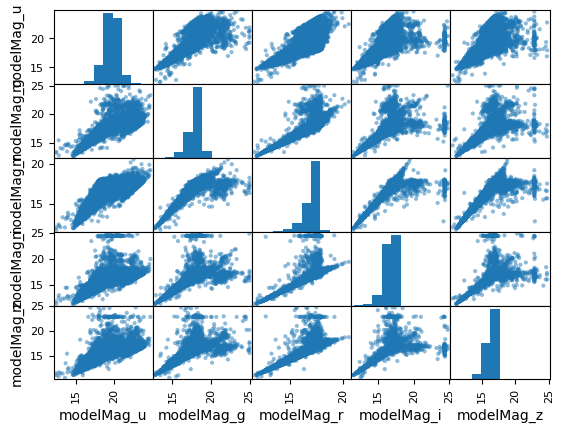

In [5]:
pd.plotting.scatter_matrix(model_vals)

In [11]:
from sklearn import decomposition
from matplotlib import pyplot as plt
import numpy as np

[0.87625931 0.9908986  0.99573974 0.99876858 1.        ]


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>,
        <Axes: xlabel='4', ylabel='3'>],
       [<Axes: xlabel='0', ylabel='4'>, <Axes: xlabel='1', ylabel='4'>,
        <Axes: xlabel='2', ylabel='4'>, <Axes: xlabel='3', ylabel='4'>,
        <Axes: xlabel='4', ylabel='4'>]], dtype=object)

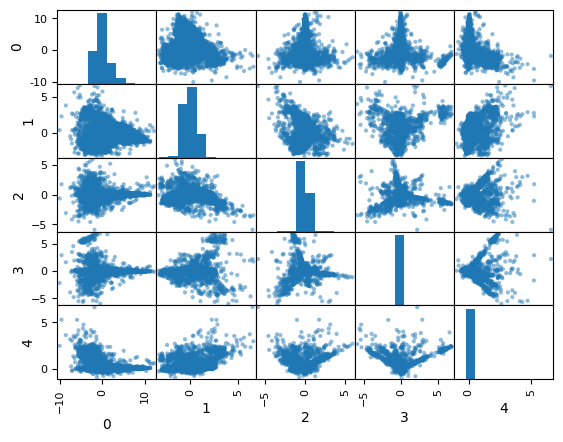

In [25]:
model_pca = decomposition.PCA().fit(model_vals)
print(np.cumsum(model_pca.explained_variance_ratio_))


components = model_pca.components_
reconst = model_pca.transform(model_vals)


reconst = pd.DataFrame(reconst)
pd.plotting.scatter_matrix(reconst, c)

In [24]:
print(np.shape(reconst))
print(np.shape(model_vals))
print(model_vals.dtype)

(661598, 5)
(661598, 5)


AttributeError: 'DataFrame' object has no attribute 'dtype'